# Phase noise
Ricardo GRANADOS

### **Content**
- [Noise Generation](#1.-Noise-Generation)<cite data-cite="3705591/E2W8TA4E"></cite>
- [Simulation](#2.-Simulation)

The phase noise is often expressed with a sum of power law noises, the most often encountered in an oscillator are the  and  noises, known as flicker and white frequency noises, but it will depend in the clock to know which type of noise is present. So a general model includes all five different noise types where could go from 0 to 4. See Figure.
So the power spectral law of phase noise is expressed like:

$$
{S}_{{φ}_{i}}(f)=\sum_{n=-4}^{0} b_{i}f^{i}
$$

Or other form in terms of the fractional frequency where the exponent of the frequency ranges between –2 and 2

$$
{S}_{{y}_{i}}(f)=\sum_{n=-2}^{2} h_{i}f^{i}
$$

Where

${S}_{{y}_{i}}(f)$ denotes the spectral density of the fractional frequency random fluctuations and the fractional frequency is:

$$
y_{i} = \frac{dx_i}{dt}
$$

Which is a dimensionless quantity and where $\tau$ is the interval of time between samples.

<img align="left" style="padding-right:10px;" src="PhaseNoise/Figures/RubiolaPhaseNoise.jpg">

Figure 7 Relation between Phase, differential frequency spectrum, and Allan variance of fractional frequency. From Enrico Rubiola Phase noise book. [ CITATION Rub09 \l 1036 ]

There are some forms to transform this frequency domain values to time domain from[ CITATION Rub09 \l 1036 ] we have:

TABLE

Where $b_i$ is the power amplitude of each noise type are, $f^i$ is the frequency of each point in the phase noise profile, $f_H$ is the cutoff frequency of a low pass needed for noise power remain finite.
With this values is possible to validate the noise generation.

## 1. Noise Generation

From the datasheet we have the Phase noise profile for certain frequencies above the carrier of our clock. This means we could generate a graph like the one shown in the Figure 8.

<img align="left" style="padding-right:10px;" src="PhaseNoise/Figures/PhaseNoiseProfile.jpg">

Figure 8. Phase noise Profile

Where the data obtained by the datasheet is the blue line. This line is the spectrum of the single side band of phase noise to have the complete power.

$$ 
L(f) = \frac{1}{2}  S_\phi (f)
$$

Because we are using dB it is possible to do

$$
S_\phi (f) = L(f) + 3dB
$$

To convert to the power spectrum of fractional frequency is possible to use the next relation

$$
S_{y} = \frac{f^2}{f_{0}^{2}} S_\phi (f)
$$

Where $f$ is the frequency offset of the carrier and $f_0$ is the nominal frequency. So the same phase noise profile as a fractional frequency representation will be

<img align="left" style="padding-right:10px;" src="PhaseNoise/Figures/FracFrecPhaseNoise.jpg">

Figure 9 Fractional Frequency Profile converted from phase noise profile.

This graph represent the noise above the carrier, it could represent the phase noise or the fractional frequency noise. Which means that if we are able to generate noise which has the same figure noise for phase or for the fractional frequency.
There are two different procedures to generate the noise digitally:
1. Using the phase noise profile to give the shape to white noise and using the inverse Fourier transform to obtain a time signal.
2. Generating each type of noise and adding them.

## 2. Simulation

The idea is to generate a noise similar to the one presented in the datasheet to include it in the simulator to have a clearer idea of the performances of the clocks.

### Octave Code

With the Phase profile spectrum is possible to generate a time sequence representing this noise. Because there are infinitely options of time sequences that could create the spectrum it is necessary to validate the model in the simulator and to repeat the test several times to have an average.
Steps to follow:

$1.$ Convert the phase spectrum noise to fractional frequency spectrum. 
As it is possible to seen the phase noise profile given from datasheet always is in the form $L(f)$ which is de Single sided band spectrum, as we may introduce the complete spectrum during the process, it not necessary to use the relation $L(f) = \frac{1}{2}  S_\phi (f)$ to complete the power. The IFT (inverse Fourier transform) is used directly to generate a time series that will represent a function of phase in time. But the interest is in generate a fractional frequency time series $\frac{\Delta f}{f}$  to be used in the simulator, as we already have the use of this parameter. So the first step is to change this profile to fractional frequency.

$$
S_y (f) = \frac{f^2}{f_0^2} (10^{\frac{L_{dB} (f)}{10}})
$$

Where $f$ is the frequency location of the point to convert and $f_0$ is the frequency of the clock.
Is possible to appreciate the change in slopes from phase to fractional frequency spectrums. 

$\textbf{N.B.}$ 0Hz values will not be display in any log plot. But the minimum available value in resolution in PC is used for all the computations.

$2.$ Add the 0 Hz 0 dBc/Hz value.
First add the 0 Hz frequency amplitude in this case since the $L(f)$  is given in dBc (dB from the carrier) the amplitude at 0 Hz is 0dB. Usually the information available goes from 1Hz to 10k Hz of offset frequency. Between the first point and the 0 Hz should not be any point because is undetermined their amplitudes. (Note: Checking if is needed to remove points before the first frequency in the profile generated by the interpolation if $N$ is big. Until now there is no need because the first point of interpolation corresponds to the first point of the profile.)

$3.$ Calculate the number of points to interpolate, taking into account the double spectrum to be generated
Is possible to compute the interpolation in log scale of M points, where $M$ is $M=N/2+1$ which includes from 0 Hz to $Fs/2$. Given N number of points needed is possible to generate interpolation point to create the spectrum.
For odd $N$

$$
M = \frac{N-1}{2} +1
$$

For even $N$

$$
M = \frac{N}{2}+1
$$

$4.$ Create interpolation vectors
The interpolation is made by taking the log of the frequency axis and interpolate lineal with the dB of the power. For even N interpolation is made from 0 to $Fs/2$ and for odd $N$ is from 0 to the nearest frequency below $Fs/2$.

$5.$ Conversion to watts
The conversion from dB to Watts is straightforward, to normalize the spectrum interpolated is necessary to multiply the frequency difference between bins, in this case it is of interest obtain amplitude so the square root of the magnitude will be taken and also the square root of the frequency difference between bins will be multiplied. 

It is needed to convert units to use them directly so dBc has too be converted to watts and then to amplitude. Because going from power to amplitude a square root is used Hz will be $\sqrt{Hz}$ so for normalizing each bin of the spectrum it is needed to multiply by the same factor $\sqrt{Hz}$.

The normalization of the frequency is done by multiplying for the square root of the difference of frequency between bins.

$6.$ White complex noise generation
It is necessary to generate white, Gaussian distributed power 1 white noise. 

$$
WGN = \sqrt{0.5}(rand(N)+j*rand(N))
$$

$7.$ Filtering the white noise
Filter the noise with the spectrum interpolated.

$$
L(f)*WGN
$$

$8.$ Completing the spectrum
The complete of the spectrum is done by taking all the interpolated vector except the 0 and F/s bins for the even N, and all the points except the 0Hz for odd and complex conjugated flipped version put at the end of the original interpolated vector.

$9.$ Inverse Fourier Transform
Apply the IFFT to obtain a time series vector
After this a time series vector is generated that represents the fractional frequency random changes. To be sure of the generation an Allan Variance analysis is performed to prove the generation of the noise. 
Here is also multiplied a constant to compensate the factor introduced by IFFT of N.

$$
x(t) = N*IFFT\{ L(f)*WGN \}
$$



<table style="width:50%">
  <tr>
    <th>$f [Hz]$</th>
    <th>$\mathbb{L}(f) \big[ \frac{dBc}{Hz} \big]$</th> 
  </tr>
  <tr style="width:50%">
    <td >Jill</td>
    <td >Smith</td> 
  </tr>
  <tr style="width:50%">
    <td>Eve</td>
    <td>Jackson</td> 
  </tr>
</table>

nd the values are accord to the direct transform between Phase noise values and time domain Allan variance, also it goes well with the plot given by [ CITATION Ond10 \l 1036 ].

Example, using the data from the table as a noise Profile, we will follow the process using the steps and apply overlapped Allan Variance to conclude if it is well done.

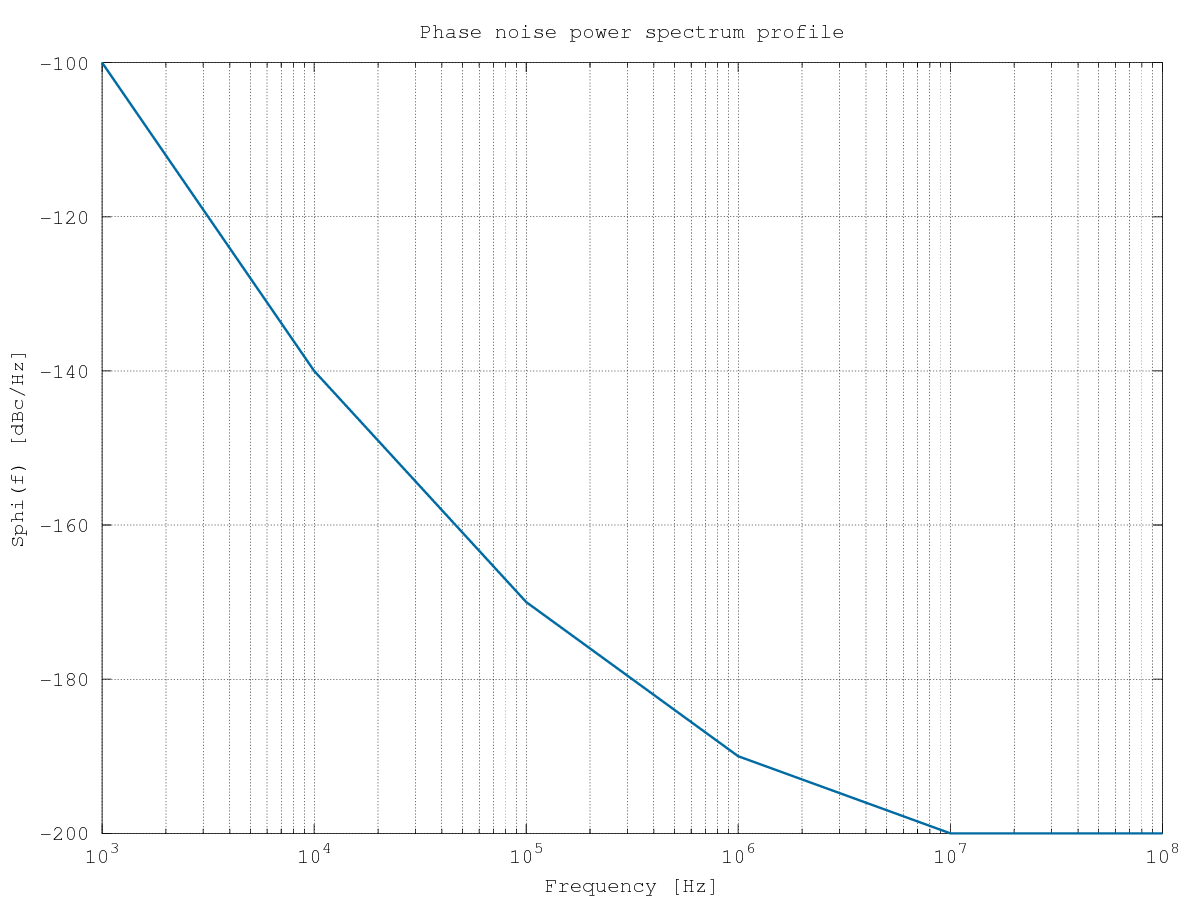

In [1]:
%-------------------------------------------------------------------------------
% Parameters for the calculations and signal
%-------------------------------------------------------------------------------
Fc = 1e7;                                          % Carrier frequency
Fs = 1e8;                                         % Sampling frequency
Ts = 1/Fs;                                          % Sampling Period
t = 0:99999;                                         % Number of points N
S = exp(j*2*pi*Fc/Fs*t);                            % Complex sinusoid
phase_noise_freq = [  1e3,  1e4,  1e5,  1e6,  1e7,  1e8];       % Offset From Carrier
phase_noise_power = [  -100, -140, -170, -190, -200, -200];     % Phase Noise power
%h = figure ();
%set(f,'visible','off')
semilogx(phase_noise_freq, phase_noise_power,'Linewidth',4,'Color',[0/255,107/255,164/255])
grid on
title('Phase noise power spectrum profile')
xlabel('Frequency [Hz]')
ylabel('Sphi(f) [dBc/Hz]')
%saveas(h,"Phase_noise_power_spectrum_profile666.jpg")
%set(h,'visible','off')
%print -djpg Phase_noise_power_spectrum_profile.jpg
%print(f, 'phasenoise666.jpg');

%-------------------------------------------------------------------------------

Then is converted to fractional frequency 

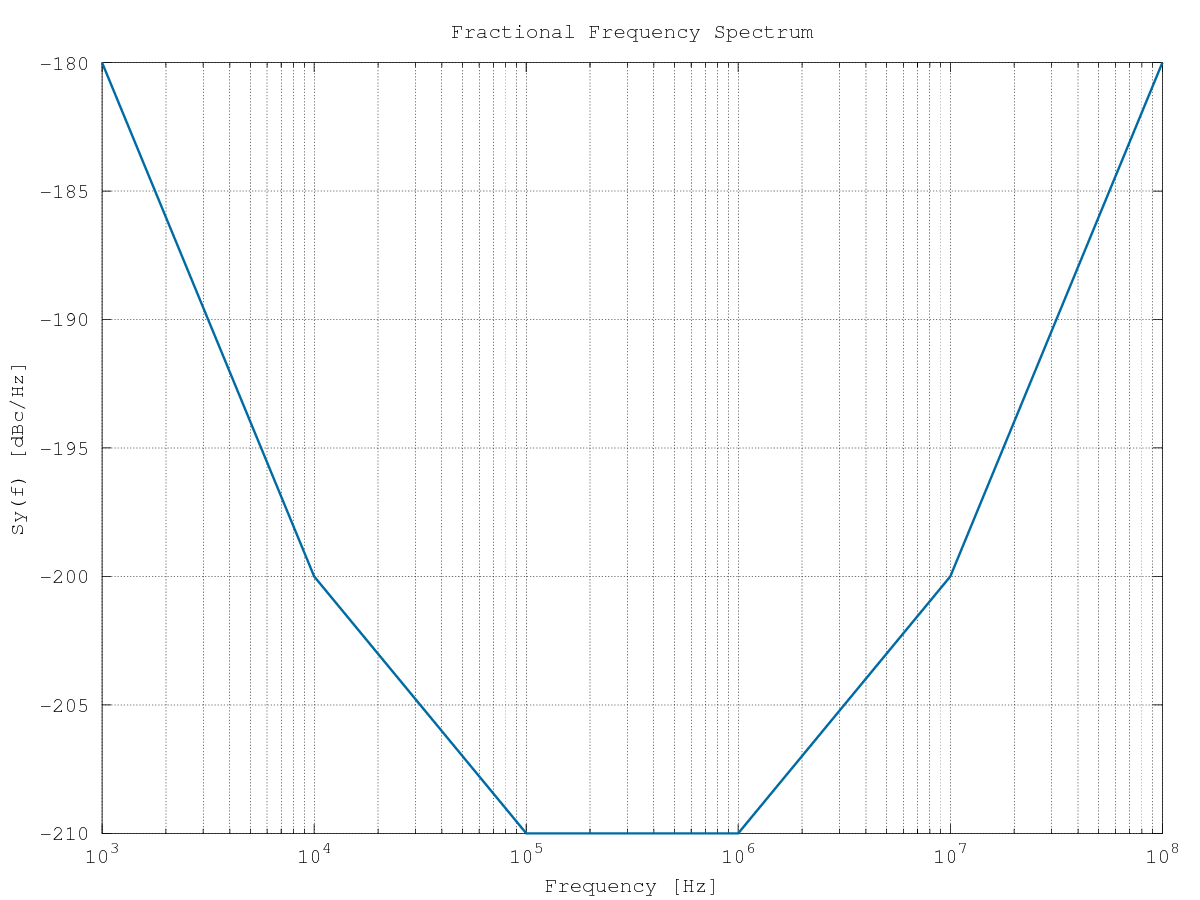

In [10]:
%-------------------------------------------------------------------------------
% Changing L(f) to Sy(f) to have Fractional frequency spectrum
%-------------------------------------------------------------------------------
phase_noise_power_watt = 10.^(phase_noise_power/10);
phase_noise_freq_sqr = phase_noise_freq.^2;
fracfreq_noise = ((phase_noise_freq_sqr).*(phase_noise_power_watt))/(Fc*Fc);
fracfreq_noise = 10*log10(fracfreq_noise);
%h = figure();
semilogx(phase_noise_freq, fracfreq_noise,'Linewidth',4,'Color',[0/255,107/255,164/255]);
grid on
title('Fractional Frequency Spectrum')
xlabel('Frequency [Hz]')
ylabel('Sy(f) [dBc/Hz]')
%saveas(h,"Phase_noise_power_spectrum_profile_fractionalfreq.jpg")
%set(h,'visible','off')
%print -djpg Phase_noise_power_spectrum_profile.jpg
%-------------------------------------------------------------------------------



Then the 0Hz 0dBc/Hz element is added to the original array. 

In [11]:
% Add 0 dBc/Hz @ DC
if ~any(phase_noise_freq == 0)
     phase_noise_power = [ 0, phase_noise_power];%, phase_noise_power(end)  ];
     phase_noise_freq = [0, phase_noise_freq];%, Fs/2];
end

After this the interpolation is done from 0 to Fs/2 Hz.

In [13]:
% Calculate input length
N = prod( size( S ) );

if rem(N,2),    % N odd
     M = (N-1)/2 + 1;
     %printf('N is odd')
else
     M = N/2 + 1;
     %printf('N is even')
end
% Equally spaced partitioning of the half spectrum
F  = linspace( 0, Fs/2, M ) ;   % Freq. Grid 
dF = [diff(F) F(end)-F(end-1)]; % Delta F
% Put the last value of FS/2
iphase_noise_power = [phase_noise_power];%
iphase_noise_freq = [phase_noise_freq];%
ilogP = interp1(log10(iphase_noise_freq+eps), iphase_noise_power, log10(abs(F)+eps), 'linear');

The interpolated vector is then formatted to amplitude

In [18]:
iP = 10.^(real(ilogP)/20); % Interpolated P ( half spectrum [0 Fs/2] ) [ dBc/Hz ]
Pamp = iP.*sqrt(dF);

Noise Generation

In [16]:
awgn_P1 = ( sqrt(0.5)*(randn(1, M) +1j*randn(1, M)) );

Filtering the noise and compensation

In [19]:
X = Pamp .* awgn_P1; 

We can Add spurious signals to generate some additional type of noises

In [21]:
% Add  spurious signals
%--------------------
% X(3000)=10^(-0/20); %Uncomment this line to add sporoius signals
%--------------------

Completing the spectrum with the negative and conjugate frequencies

In [22]:
if rem(N,2),    % N odd
     X( M + (1:M-1) ) = fliplr( conj(X(2:end)));
else
     X( M + (1:M-2) ) = fliplr( conj(X(2:end-1)) );
end

Remove the DC component (here is the issue of removing all the frequencies below the first frequency of the noise profile)

In [23]:
X(1) = 0; 

Inverse Fourier Transform and multiply to compensate.

In [25]:
Nb=length(X);
x = Nb*ifft( X ); 

The noise created has this form

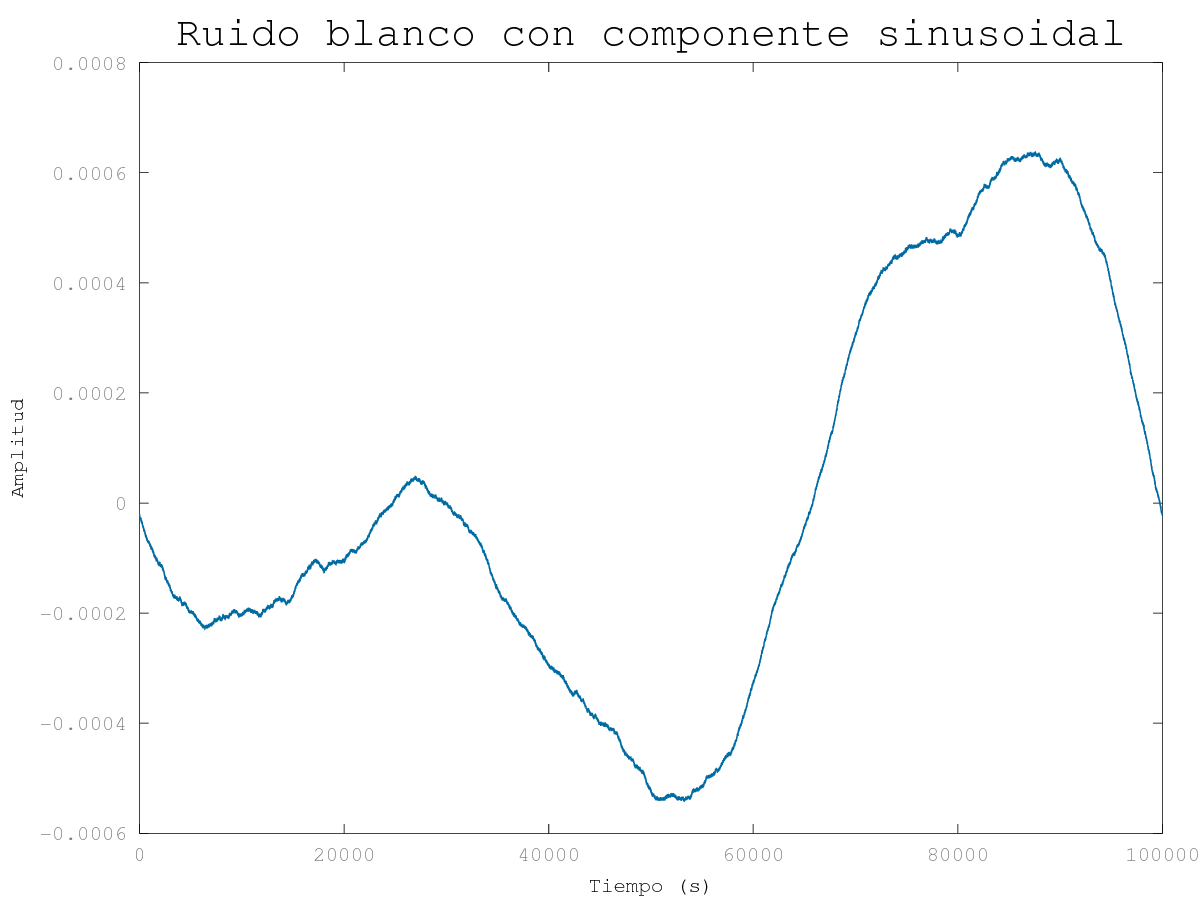

In [28]:
plot(t,real(x),'Linewidth',2,'Color',[0/255,107/255,164/255])
%axis([0 5000 -1.5 1.5])
set(gca,'FontSize',10)
title('Ruido blanco con componente sinusoidal','fontsize',20)
xlabel('Tiempo (s)')
ylabel('Amplitud')
set(gca,'Xcolor',[0.5 0.5 0.5]);
set(gca,'Ycolor',[0.5 0.5 0.5]);

# References
[1] <div class="cite2c-biblio"></div>